## 划分数据集

In [29]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [30]:
data = pd.read_csv('insurance_data_preprocessed.csv')

In [31]:
X = data.drop('annual_medical_cost', axis=1)
y = data['annual_medical_cost']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

## 使用全部的特征

In [32]:
# 准备回归模型
models = {
    "Linear Regression": LinearRegression(), # 线性回归
    "Ridge Regression": Ridge(), # 岭回归
    "Decision Tree Regression": DecisionTreeRegressor(), # 决策树回归 
    "Random Forest Regression": RandomForestRegressor(),  # 随机森林回归
    "Gradient Boosting Regression": GradientBoostingRegressor(),  # 梯度提升回归
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam',  max_iter=1000, random_state=42) # 前馈神经网络
}

def regression_train(X_train, X_test, y_train=y_train, y_test=y_test, models=models,):
    for name, model in models.items():
        time_start = time.time()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2_score_model = r2_score(y_test, predictions)
        mse_score = mean_squared_error(y_test, predictions)
        mae_score = mean_absolute_error(y_test, predictions)

        print("Model:", name)
        print("R2 Score:", r2_score_model)
        print("MSE Score:", mse_score)
        print("MAE Score:", mae_score)
        time_end = time.time()
        print(f"time: {time_end - time_start}")
        print()

# 使用全部的特征进行训练并评估模型
print("Regression Models Evaluation of all feature:")
regression_train(X_train=X_train1, X_test=X_test1, models=models)

Regression Models Evaluation of all feature:
Model: Linear Regression
R2 Score: 0.9670213941750366
MSE Score: 331471.9300647793
MAE Score: 321.57208647709655
time: 0.138047456741333

Model: Ridge Regression
R2 Score: 0.96702261260229
MSE Score: 331459.6835060418
MAE Score: 321.55236767736557
time: 0.059873104095458984

Model: Decision Tree Regression
R2 Score: 0.9991565440023447
MSE Score: 8477.677587446933
MAE Score: 8.84817495675874
time: 1.4130442142486572

Model: Random Forest Regression
R2 Score: 0.9993064018963511
MSE Score: 6971.437886913881
MAE Score: 6.259545778080601
time: 136.9585738182068

Model: Gradient Boosting Regression
R2 Score: 0.9988574458955101
MSE Score: 11483.948600763342
MAE Score: 47.71728468954799
time: 29.77554178237915

Model: MLP Regressor
R2 Score: 0.9916580202797954
MSE Score: 83846.24059287476
MAE Score: 142.66421888946084
time: 104.70085215568542



## 使用部分特征

In [33]:
df1 = data.monthly_premium*12 - data.annual_premium
df1.mean(), df1.std()

(-5.451076587577897e-06, 0.03494334204547763)

monthly_premium 和 annual_premium 是高度相关的特征，因为：

均值接近0（-5.45e-06），说明 monthly_premium * 12 ≈ annual_premium

标准差很小（0.035），说明两者差异很小。

因此只保留其中一个即可，这里选择保留 annual_premium 。

In [34]:
X_train2 = X_train1.drop('monthly_premium', axis=1)
X_test2 = X_test1.drop('monthly_premium', axis=1)

### 只选取前 10 个重要的特征进行建模
使用Gradient Boosting分析特征的重要性，然后选取前10个最重要的特征进行训练模型并评价模型。

前 10 个重要性特征排序:
              feature  importance
23     annual_premium    0.940334
16       network_tier    0.055417
26  total_claims_paid    0.003418
17         deductible    0.000642
15              hba1c    0.000054
25   avg_claim_amount    0.000051
13       diastolic_bp    0.000049
24       claims_count    0.000010
19  policy_term_years    0.000005
48       region_North    0.000005


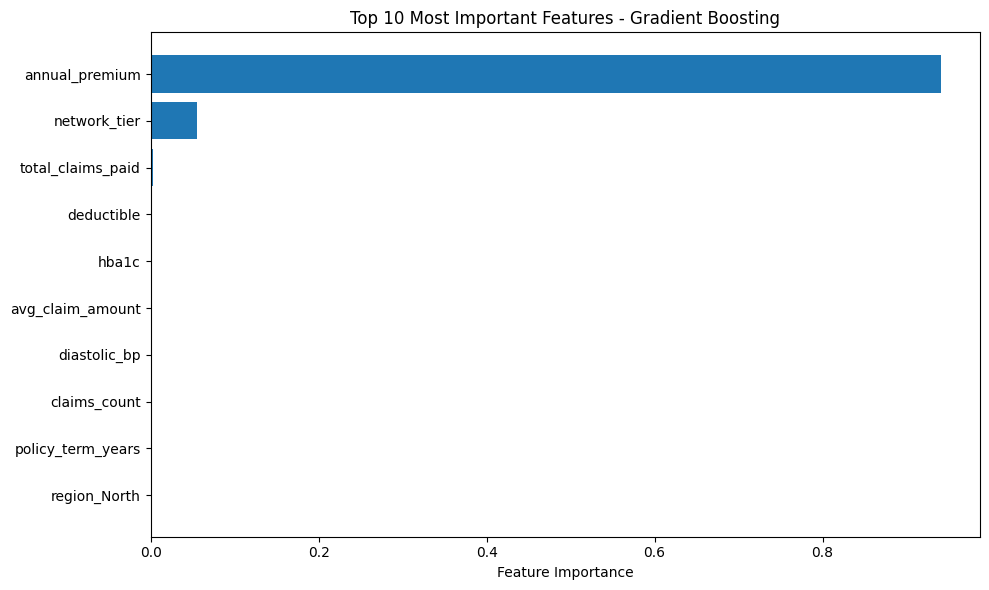

In [35]:
# 使用Gradient Boosting分析特征重要性
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train2, y_train)

# 获取特征重要性
feature_importance = pd.DataFrame({
    'feature': X_train2.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("前 10 个重要性特征排序:")
print(feature_importance.head(10))

# 可视化前10个最重要的特征
plt.figure(figsize=(10, 6))

# 取前10个特征
top_10_features = feature_importance.head(10)

plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features - Gradient Boosting')
plt.gca().invert_yaxis()  # 让最重要的特征显示在顶部
plt.tight_layout()
plt.show()

In [ ]:
# 获取前10个特征名称
top_10_feature_names = feature_importance.head(10)['feature'].tolist()
print("前10个重要特征:", top_10_feature_names, sep='\n')

# 创建只包含前10个特征的数据集
X_train_top10 = X_train2[top_10_feature_names]
X_test_top10 = X_test2[top_10_feature_names]  

# 使用部分的特征进行训练并评估模型
print("\nRegression Models Evaluation of some feature:")
regression_train(X_train=X_train_top10, X_test=X_test_top10, models=models)


前10个重要特征:
['annual_premium', 'network_tier', 'total_claims_paid', 'deductible', 'hba1c', 'avg_claim_amount', 'diastolic_bp', 'claims_count', 'policy_term_years', 'region_North']

Regression Models Evaluation of some feature:
Model: Linear Regression
R2 Score: 0.9667912264039794
MSE Score: 333785.37399009184
MAE Score: 322.0777906510562
time: 0.02226543426513672

Model: Ridge Regression
R2 Score: 0.9667912236123173
MSE Score: 333785.40204942337
MAE Score: 322.0758026110736
time: 0.00810384750366211

Model: Decision Tree Regression
R2 Score: 0.9991280059497587
MSE Score: 8764.516983301013
MAE Score: 6.812000628963783
time: 0.4021768569946289

Model: Random Forest Regression
R2 Score: 0.9994883834031488
MSE Score: 5142.3198940403445
MAE Score: 5.358323947795975
time: 38.216941833496094

Model: Gradient Boosting Regression
R2 Score: 0.9989426824240445
MSE Score: 10627.226009902506
MAE Score: 47.62503917913034
time: 9.269356727600098

Model: MLP Regressor
R2 Score: 0.9863821524042697
MSE Sc

### 只使用 annual_premium 特征

In [40]:
# 只取 annual_premium 特征
X_train_annual_premium = X_train1[['annual_premium']]
X_test_annual_premium = X_test1[['annual_premium']]

# 只使用 annual_premium 特征进行训练并评估模型
print("\nRegression Models Evaluation just of annual_premium feature:")
regression_train(X_train=X_train_annual_premium, X_test=X_test_annual_premium, models=models)


Regression Models Evaluation just of annual_premium feature:
Model: Linear Regression
R2 Score: 0.9335450686075611
MSE Score: 667946.5010707035
MAE Score: 480.67582197291347
time: 0.003843069076538086

Model: Ridge Regression
R2 Score: 0.9335450686062696
MSE Score: 667946.5010836851
MAE Score: 480.67582200926546
time: 0.0020287036895751953

Model: Decision Tree Regression
R2 Score: 0.8719461938279126
MSE Score: 1287084.1935917442
MAE Score: 615.4951275126501
time: 0.14140963554382324

Model: Random Forest Regression
R2 Score: 0.9041950448853456
MSE Score: 962947.1163873649
MAE Score: 558.3280858984866
time: 13.515352010726929

Model: Gradient Boosting Regression
R2 Score: 0.9333879716558244
MSE Score: 669525.5014103733
MAE Score: 464.68675548864957
time: 3.2798521518707275

Model: MLP Regressor
R2 Score: 0.9335578472233419
MSE Score: 667818.0616679315
MAE Score: 481.97377392675406
time: 10.28363299369812



## 定价优化方案 - 直接提升利润率

In [49]:
# 选择 随机森林回归 模型
model = RandomForestRegressor()  # 随机森林回归
# {
#     "Linear Regression": LinearRegression(), # 线性回归
#     "Ridge Regression": Ridge(), # 岭回归
#     "Decision Tree Regression": DecisionTreeRegressor(), # 决策树回归 
#     "Random Forest Regression": RandomForestRegressor(),  # 随机森林回归
#     "Gradient Boosting Regression": GradientBoostingRegressor(),  # 梯度提升回归
#     "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam',  max_iter=1000, random_state=42) # 前馈神经网络
# }
X_train_top10
time_start = time.time()
model.fit(X_train_top10, y_train)
predictions = model.predict(X_test_top10)
r2_score_model = r2_score(y_test, predictions)
mse_score = mean_squared_error(y_test, predictions)
mae_score = mean_absolute_error(y_test, predictions)

print("Model:", model)
print("R2 Score:", r2_score_model)
print("MSE Score:", mse_score)
print("MAE Score:", mae_score)
time_end = time.time()
print(f"time: {time_end - time_start}")
print()


Model: RandomForestRegressor()
R2 Score: 0.9996371522590334
MSE Score: 3647.026246537743
MAE Score: 5.155791136852016
time: 38.61100196838379



In [ ]:
def identify_pricing_issues(X_test, y_test, y_pred):
    """
    识别当前定价存在的问题区域
    """
    # 计算当前利润率
    current_profit_margin = (X_test['annual_premium'] - y_pred) / X_test['annual_premium']
    
    # 识别问题客户群
    pricing_issues = {
        '严重亏损': (y_pred > X_test['annual_premium'] * 1.5),  # 医疗费用 > 保费的1.5倍
        '轻微亏损': (y_pred > X_test['annual_premium'] * 1.1) & (y_pred <= X_test['annual_premium'] * 1.5),
        '利润丰厚': (y_pred < X_test['annual_premium'] * 0.7),   # 医疗费用 < 保费的70%
        '合理利润': (y_pred >= X_test['annual_premium'] * 0.7) & (y_pred <= X_test['annual_premium'] * 1.1)
    }
    
    print("=== 当前定价问题分析 ===")
    for issue, mask in pricing_issues.items():
        count = mask.sum()
        avg_loss = (y_pred[mask] - X_test['annual_premium'][mask]).sum() if '亏损' in issue else 0
        print(f"{issue}: {count}人, 预计年损失: {avg_loss:,.0f}元")
    
    return pricing_issues, current_profit_margin

# 运行分析
pricing_issues, profit_margin = identify_pricing_issues(X_test_top10, y_test, predictions)

In [50]:
def identify_pricing_issues_corrected(X_test, y_pred):
    """
    基于预测值识别定价问题 - 用于业务决策
    """
    # 计算预期利润率（基于预测）
    expected_profit_margin = (X_test['annual_premium'] - y_pred) / X_test['annual_premium']
    
    # 识别问题客户群 - 基于预期
    pricing_issues = {
        '预期严重亏损': (y_pred > X_test['annual_premium'] * 1.5),    # 预测费用 > 保费的1.5倍
        '预期轻微亏损': (y_pred > X_test['annual_premium'] * 1.1) & (y_pred <= X_test['annual_premium'] * 1.5),
        '预期利润丰厚': (y_pred < X_test['annual_premium'] * 0.7),     # 预测费用 < 保费的70%
        '预期合理利润': (y_pred >= X_test['annual_premium'] * 0.7) & (y_pred <= X_test['annual_premium'] * 1.1)
    }
    
    print("=== 基于预测的定价问题分析 ===")
    for issue, mask in pricing_issues.items():
        count = mask.sum()
        expected_loss = (y_pred[mask] - X_test['annual_premium'][mask]).sum() if '亏损' in issue else 0
        avg_expected_margin = expected_profit_margin[mask].mean() if count > 0 else 0
        
        print(f"{issue}: {count}人")
        print(f"  预期年损失: {expected_loss:,.0f}元")
        print(f"  平均预期利润率: {avg_expected_margin:.1%}")
        print()
    
    return pricing_issues, expected_profit_margin

# 运行修正后的分析
pricing_issues, expected_margin = identify_pricing_issues_corrected(X_test_top10, predictions)

=== 基于预测的定价问题分析 ===
预期严重亏损: 18632人
  预期年损失: 47,264,564元
  平均预期利润率: -357.5%

预期轻微亏损: 299人
  预期年损失: 23,945元
  平均预期利润率: -31.1%

预期利润丰厚: 13人
  预期年损失: 0元
  平均预期利润率: 34.4%

预期合理利润: 135人
  预期年损失: 0元
  平均预期利润率: 7.4%



In [52]:
# 分析亏损案例的特征
def analyze_loss_cases(X_test, y_pred, pricing_issues):
    """
    深入分析严重亏损案例的特征
    """
    severe_loss_mask = pricing_issues['预期严重亏损']
    
    if severe_loss_mask.sum() > 0:
        loss_cases = X_test[severe_loss_mask].copy()
        loss_cases['predicted_cost'] = y_pred[severe_loss_mask]
        loss_cases['current_premium'] = X_test['annual_premium'][severe_loss_mask]
        loss_cases['loss_ratio'] = loss_cases['predicted_cost'] / loss_cases['current_premium']
        
        print("=== 严重亏损案例分析 ===")
        print(f"样本数量: {len(loss_cases)}")
        print(f"平均损失比率: {loss_cases['loss_ratio'].mean():.1f}倍")
        
        # 检查关键特征
        for feature in ['annual_premium', 'network_tier', 'total_claims_paid']:
            if feature in loss_cases.columns:
                print(f"\n{feature}分布:")
                print(loss_cases[feature].describe())
        
        return loss_cases
    return None

loss_cases = analyze_loss_cases(X_test_top10, predictions, pricing_issues)

=== 严重亏损案例分析 ===
样本数量: 18632
平均损失比率: 4.6倍

annual_premium分布:
count    18632.000000
mean       596.896191
std        404.127945
min        240.190000
25%        361.242500
50%        473.410000
75%        681.252500
max       9351.480000
Name: annual_premium, dtype: float64

network_tier分布:
count    18632.00000
mean         1.09328
std          0.93913
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          3.00000
Name: network_tier, dtype: float64

total_claims_paid分布:
count    18632.000000
mean      1420.703983
std       2364.535358
min          0.000000
25%          0.000000
50%        679.160000
75%       1843.310000
max      72517.950000
Name: total_claims_paid, dtype: float64


## 其他分析
因为模型的效果都比较好

In [41]:
# 分析不同保费区间的医疗费用分布
premium_bins = pd.cut(X_train2['annual_premium'], bins=5)
premium_analysis = pd.DataFrame({
    'premium_range': premium_bins,
    'medical_cost': y_train,
    'count': 1
})

result = premium_analysis.groupby('premium_range').agg({
    'medical_cost': ['mean', 'std', 'count'],
    'count': 'sum'
})

print("不同保费区间的医疗费用分析:")
print(result)

不同保费区间的医疗费用分析:
                      medical_cost                      count
                              mean          std  count    sum
premium_range                                                
(200.919, 2361.846]    2890.125885  2565.416502  75744  75744
(2361.846, 4512.022]  20359.716627  5252.231036    507    507
(4512.022, 6662.198]  35974.378519  8497.171901     54     54
(6662.198, 8812.374]  52301.887143  4705.037892      7      7
(8812.374, 10962.55]  60229.956667  6422.963212      3      3


C:\Users\A208-7\AppData\Local\Temp\ipykernel_14076\389562759.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = premium_analysis.groupby('premium_range').agg({


In [43]:
# 进一步分析亏损原因
plt.figure(figsize=(12, 4))

# 1. 查看高保费群体的特征分布
high_premium_mask = X_train2['annual_premium'] > 2361
high_premium_data = pd.concat([X_train2[high_premium_mask], y_train[high_premium_mask]], axis=1)

print("高保费群体特征分析:")
print(f"样本数量: {len(high_premium_data)}")
if 'age' in high_premium_data.columns:
    print(f"平均年龄: {high_premium_data['age'].mean():.1f}")
if 'total_claims_paid' in high_premium_data.columns:
    print(f"平均历史索赔: {high_premium_data['total_claims_paid'].mean():.1f}")

# 2. 计算保险公司的预期损失
premium_ranges = [
    (2361, 4512), (4512, 6662), (6662, 8812), (8812, 10962)
]

print("\n保险公司风险分析:")
for i, (low, high) in enumerate(premium_ranges):
    mask = (X_train2['annual_premium'] > low) & (X_train2['annual_premium'] <= high)
    if mask.sum() > 0:
        avg_premium = X_train2[mask]['annual_premium'].mean()
        avg_medical_cost = y_train[mask].mean()
        expected_loss = avg_medical_cost - avg_premium
        loss_ratio = avg_medical_cost / avg_premium
        
        print(f"保费区间 ({low}-{high}]:")
        print(f"  平均保费: {avg_premium:.0f}")
        print(f"  平均医疗费用: {avg_medical_cost:.0f}") 
        print(f"  预期损失: {expected_loss:.0f}")
        print(f"  损失比率: {loss_ratio:.2f}x")

高保费群体特征分析:
样本数量: 571
平均年龄: 55.0
平均历史索赔: 12390.0

保险公司风险分析:
保费区间 (2361-4512]:
  平均保费: 2953
  平均医疗费用: 20360
  预期损失: 17407
  损失比率: 6.90x
保费区间 (4512-6662]:
  平均保费: 5154
  平均医疗费用: 35974
  预期损失: 30820
  损失比率: 6.98x
保费区间 (6662-8812]:
  平均保费: 6983
  平均医疗费用: 52302
  预期损失: 45319
  损失比率: 7.49x
保费区间 (8812-10962]:
  平均保费: 9565
  平均医疗费用: 59447
  预期损失: 49881
  损失比率: 6.21x


<Figure size 1200x400 with 0 Axes>

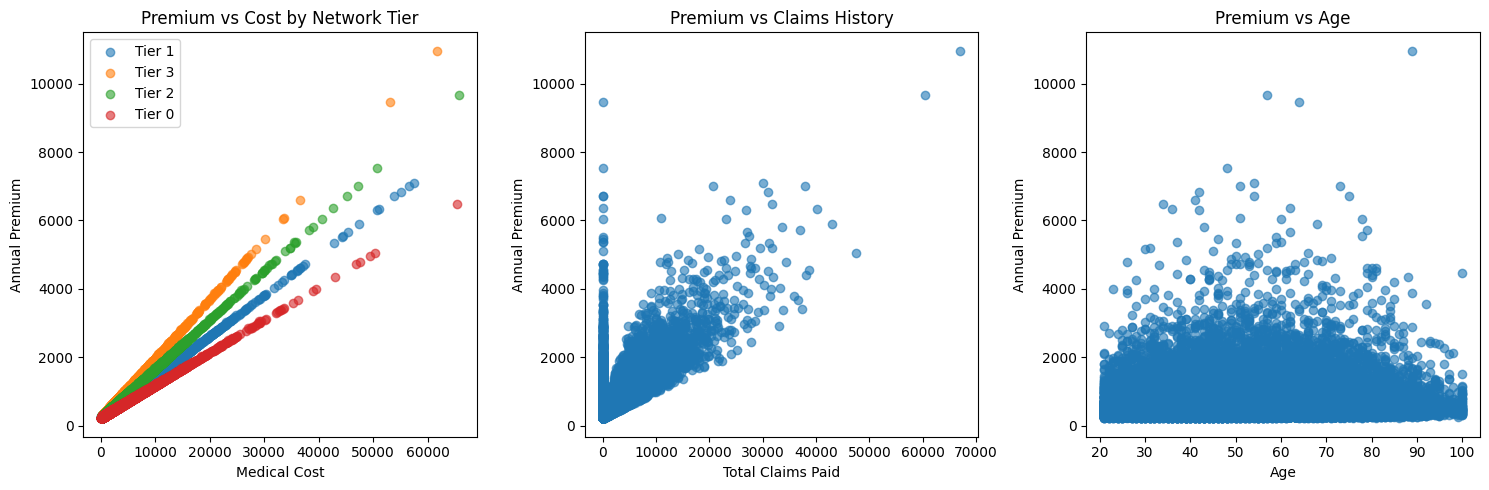

In [42]:
# 检查相同医疗费用下，不同人群的保费差异
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# 按network_tier分组
for tier in X_train2['network_tier'].unique():
    mask = X_train2['network_tier'] == tier
    plt.scatter(y_train[mask], X_train2['annual_premium'][mask], 
                alpha=0.6, label=f'Tier {tier}')
plt.xlabel('Medical Cost')
plt.ylabel('Annual Premium')
plt.legend()
plt.title('Premium vs Cost by Network Tier')

plt.subplot(1, 3, 2)
# 检查保费与索赔历史的关系
plt.scatter(X_train2['total_claims_paid'], X_train2['annual_premium'], alpha=0.6)
plt.xlabel('Total Claims Paid')
plt.ylabel('Annual Premium')
plt.title('Premium vs Claims History')

plt.subplot(1, 3, 3)
# 保费与年龄的关系（如果数据中有年龄）
if 'age' in X_train2.columns:
    plt.scatter(X_train2['age'], X_train2['annual_premium'], alpha=0.6)
    plt.xlabel('Age')
    plt.ylabel('Annual Premium')
    plt.title('Premium vs Age')

plt.tight_layout()
plt.show()